Уралова, ИУ5-65Б, РК №1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv', sep=",")

In [3]:
data.shape

(128, 27)

In [4]:
data.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [5]:
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [6]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 128


In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка 1st Goal. Тип данных float64. Количество пустых значений 34, 26.56%.
Колонка Own goals. Тип данных float64. Количество пустых значений 116, 90.62%.
Колонка Own goal Time. Тип данных float64. Количество пустых значений 116, 90.62%.


In [9]:
data_num = data[num_cols]
data_num

,1st Goal,Own goals,Own goal Time
0,12.0,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,89.0,NaN,NaN
4,NaN,1.0,90.0
...,...,...,...
123,5.0,NaN,NaN
124,4.0,NaN,NaN
125,NaN,NaN,NaN
126,18.0,1.0,18.0


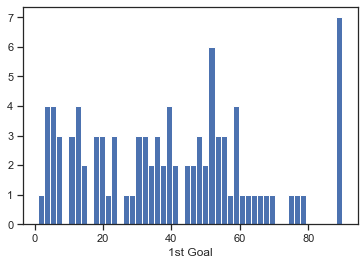

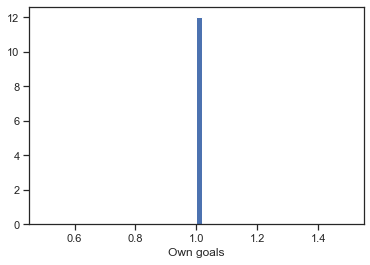

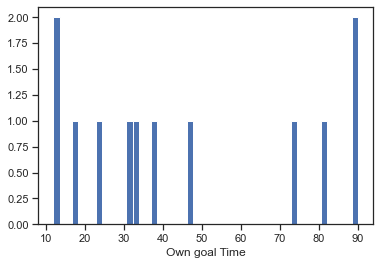

In [10]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [11]:
# Будем рассматривать 1st Goal, так как в двух других признаках процент пропусков около 90%
data_num_1stGoal = data_num[['1st Goal']]
data_num_1stGoal.head()

,1st Goal
0,12.0
1,NaN
2,NaN
3,89.0
4,NaN


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [13]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_1stGoal)
mask_missing_values_only

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [14]:
strategies=['mean', 'median', 'most_frequent']

In [15]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_1stGoal)
    return data_num_imp[mask_missing_values_only]

In [16]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([39.45744681, 39.45744681, 39.45744681, 39.45744681, 39.45744681,
        39.45744681, 39.45744681, 39.45744681, 39.45744681, 39.45744681,
        39.45744681, 39.45744681, 39.45744681, 39.45744681, 39.45744681,
        39.45744681, 39.45744681, 39.45744681, 39.45744681, 39.45744681,
        39.45744681, 39.45744681, 39.45744681, 39.45744681, 39.45744681,
        39.45744681, 39.45744681, 39.45744681, 39.45744681, 39.45744681,
        39.45744681, 39.45744681, 39.45744681, 39.45744681]))

In [17]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([39., 39., 39., 39., 39., 39., 39., 39., 39., 39., 39., 39., 39.,
        39., 39., 39., 39., 39., 39., 39., 39., 39., 39., 39., 39., 39.,
        39., 39., 39., 39., 39., 39., 39., 39.]))

In [18]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
        90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
        90., 90., 90., 90., 90., 90., 90., 90.]))

In [19]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [20]:
data[['1st Goal']].describe()

,1st Goal
count,94.000000
mean,39.457447
std,24.496506
min,1.000000
25%,18.250000
50%,39.000000
75%,54.750000
max,90.000000


In [21]:
test_num_impute_col(data, '1st Goal', strategies[0])

('1st Goal', 'mean', 34, 39.45744680851064, 39.45744680851064)

In [22]:
test_num_impute_col(data, '1st Goal', strategies[1])

('1st Goal', 'median', 34, 39.0, 39.0)

In [23]:
test_num_impute_col(data, '1st Goal', strategies[2])

('1st Goal', 'most_frequent', 34, 90.0, 90.0)

In [24]:
#Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

В данном наборе данных нет категориального признака с пропущенными значениями, поэтому обработать пропуски категориального признака не получится.

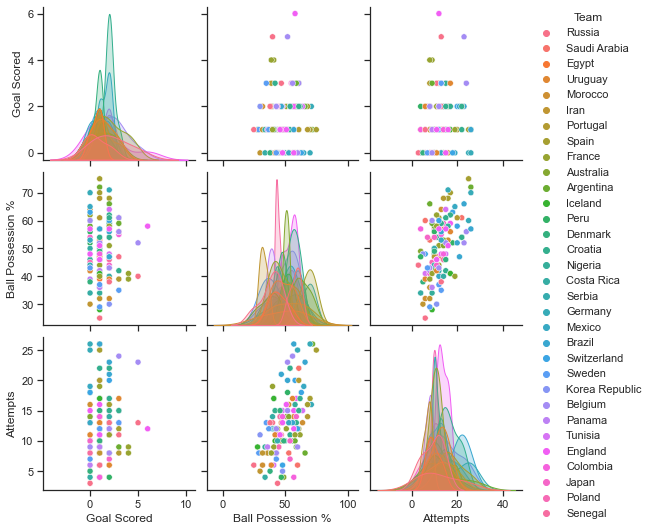

In [32]:
sns.pairplot(
    data,
    x_vars=["Goal Scored", "Ball Possession %", "Attempts"],
    y_vars=["Goal Scored", "Ball Possession %", "Attempts"],
    hue = 'Team'
)